In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('./desktop/user/911.csv')#read csv file

In [4]:
df.head() #first 5 rows/observetions

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [6]:
df['zip'].value_counts().head()#counts the num of times each unique value occurs in column zip

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [7]:
df['twp'].value_counts().iloc[:5] 

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [8]:
df['title'].nunique()#number of unique titles

110

In [9]:
df['Reason']=df['title'].apply(lambda s:s.split(':')[0])
#create a new column called reason from title column
#the index[0] returns the first EMS after the split
df['Reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

In [10]:
df['Reason'].value_counts()#counts the number of times each unique value occurs

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

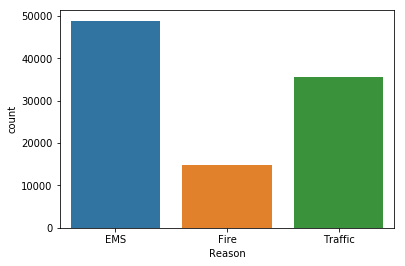

In [11]:
sns.countplot(x='Reason',data=df)#plot countplot used to plot categorical data

In [12]:
type(df['timeStamp'].iloc[0])

str

In [13]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])#Use [pd.to_datetime] to convert the column from strings to DateTime objects. **

In [14]:
type(df['timeStamp'].iloc[0])#check type

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
time=df['timeStamp'].iloc[0] #getting the first row of the column timestamp and then checking the type
time.hour #convert to hour

17

In [16]:
df['Hour']=df['timeStamp'].apply(lambda time:time.hour)#creating new columns Hour,Month,Day of Week from Timestamp
df['Month']=df['timeStamp'].apply(lambda time:time.month)
df['Day of Week']=df['timeStamp'].apply(lambda time:time.dayofweek)

In [17]:
df.sample() #check a random sample

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
14738,40.225023,-75.299728,S BROAD ST & FULTON AVE; UPPER GWYNEDD; 2016-0...,19446.0,Traffic: ROAD OBSTRUCTION -,2016-01-18 13:12:00,UPPER GWYNEDD,S BROAD ST & FULTON AVE,1,Traffic,13,1,0


In [18]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'} #create dictionary dmap

In [19]:
Day=df['Day of Week']=df['Day of Week'].apply(lambda int:dmap[int])#creating a column called day of week and assign to variable day
Day

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
5        Thu
6        Thu
7        Thu
8        Thu
9        Thu
10       Thu
11       Thu
12       Thu
13       Thu
14       Thu
15       Thu
16       Thu
17       Thu
18       Thu
19       Thu
20       Thu
21       Thu
22       Thu
23       Thu
24       Thu
25       Thu
26       Thu
27       Thu
28       Thu
29       Thu
        ... 
99462    Wed
99463    Wed
99464    Wed
99465    Wed
99466    Wed
99467    Wed
99468    Wed
99469    Wed
99470    Wed
99471    Wed
99472    Wed
99473    Wed
99474    Wed
99475    Wed
99476    Wed
99477    Wed
99478    Wed
99479    Wed
99480    Wed
99481    Wed
99482    Wed
99483    Wed
99484    Wed
99485    Wed
99486    Wed
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day of Week, Length: 99492, dtype: object

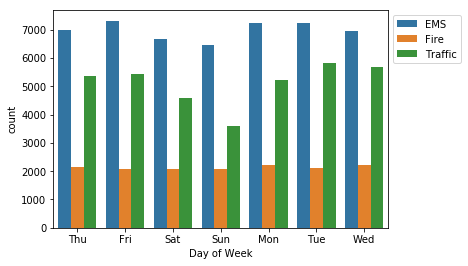

In [20]:
sns.countplot(x='Day of Week',hue='Reason',data=df)#countplot for categorical variable, hue use a categorical column
plt.legend(bbox_to_anchor=(1,1))

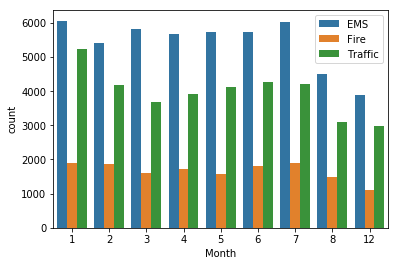

In [21]:
sns.countplot(x='Month',hue='Reason',data=df)
plt.legend(bbox_to_anchor=(1,1))

In [22]:
byMonth=df.groupby(by='Month').count()#by=month is setting montgh to row

In [23]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


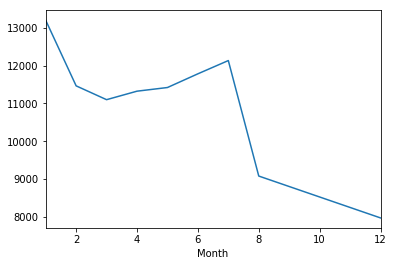

In [24]:
byMonth['lat'].plot() #plot using matplotlib

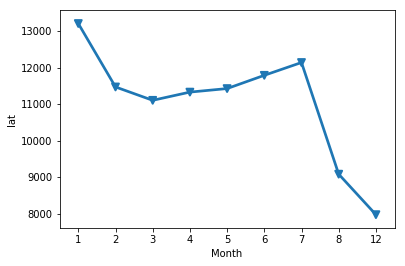

In [25]:
sns.pointplot(x=byMonth.index,y='lat',data=byMonth,markers='v') #another way to plot using seaborn where x,y,data are assigned to variables

In [26]:
byMonth['Month']=byMonth.index #reset index to a column
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week,Month
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,1
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,2
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,3
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,4
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,5
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,6
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,7
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,8
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,12


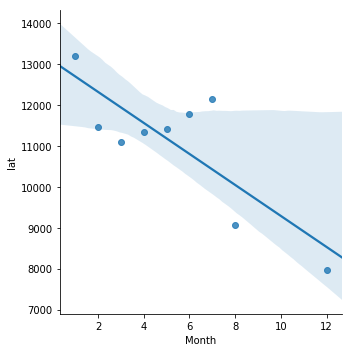

In [27]:
sns.lmplot(x='Month',y='lat',data=byMonth) #plot a regression suing lmplot of seaborn

In [28]:
df['Date']=df['timeStamp'].apply(lambda time:time.date()) #create new column called date

In [29]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


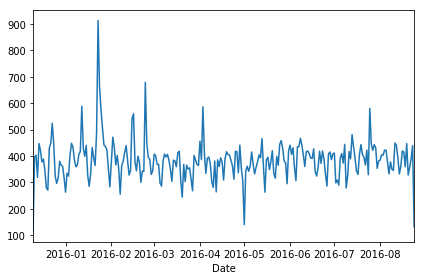

In [43]:
df.groupby(by='Date').count()['lat'].plot()#reset date as index by grouping same date together tru groupby, count() shows the table, set lat as column and plot them against themselves
plt.tight_layout() #makes the graph spacious

Text(0.5,1,'Traffic')

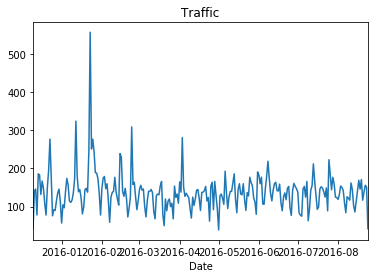

In [44]:
df[df['Reason']=='Traffic'].groupby(by='Date').count()['lat'].plot()#if Reason equals to traffic, group same dates together
plt.title('Traffic')

Text(0.5,1,'Fire')

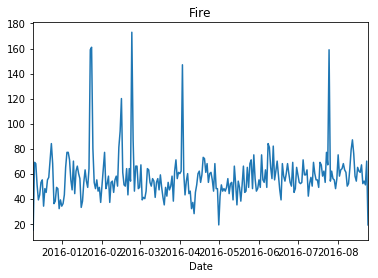

In [32]:
df[df['Reason']=='Fire'].groupby(by='Date').count()['lat'].plot()
plt.title('Fire')

Text(0.5,1,'EMS')

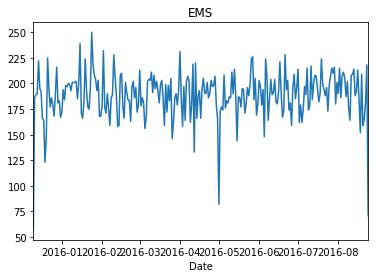

In [33]:
df[df['Reason']=='EMS'].groupby(by='Date').count()['lat'].plot()
plt.title('EMS')

In [34]:
dfGrid=df.groupby(by=['Day of Week','Hour']).count()['lat'].unstack()#setting row index as day of week and column as hour
dfGrid=dfGrid.loc[['Sun','Mon','Tue','Wed','Thu','Fri','Sat']]#setting index as strings
dfGrid

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467


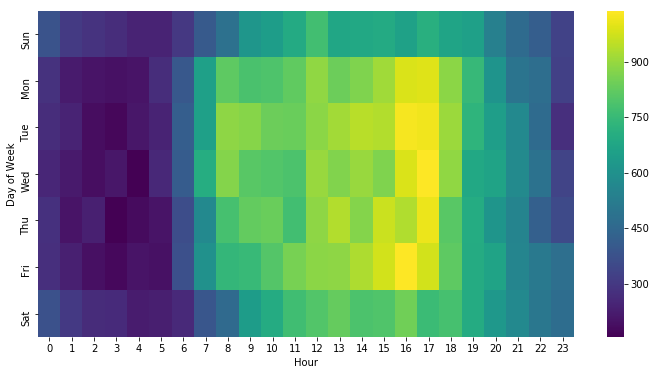

In [35]:
plt.figure(figsize=(12,6))#using matplotlib to set figsize
sns.heatmap(dfGrid,cmap='viridis')#using heatmap to visualize the whole dataframe dfGrid

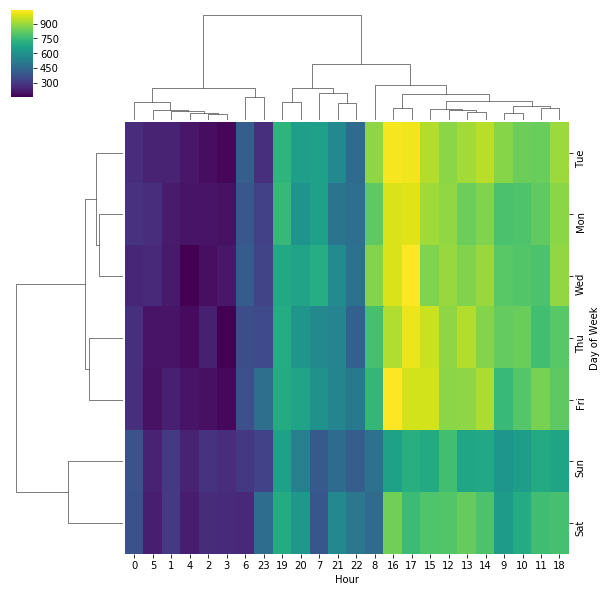

In [36]:
sns.clustermap(dfGrid, cmap='viridis') #using clustermap to cluster similarities together

In [37]:
dfMonth=df.groupby(['Day of Week','Month']).count()['lat'].unstack()#setting row index as day of week and column as month
dfMonth=dfMonth.loc[['Sun','Mon','Tue','Wed','Thu','Fri','Sat']]#setting index as strings
dfMonth

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978


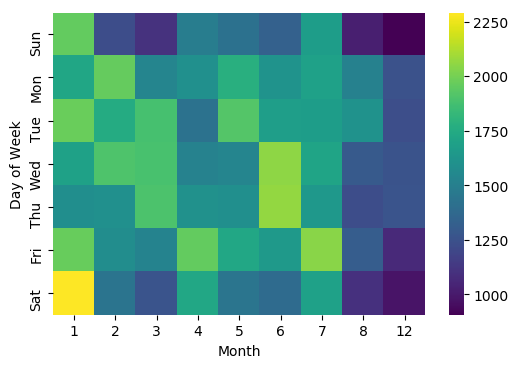

In [38]:
plt.figure(dpi=100)#using matplotlib to set figsize
sns.heatmap(dfMonth, cmap='viridis')#using heatmap to visualize the whole dataframe dfMonth

<Figure size 600x400 with 0 Axes>

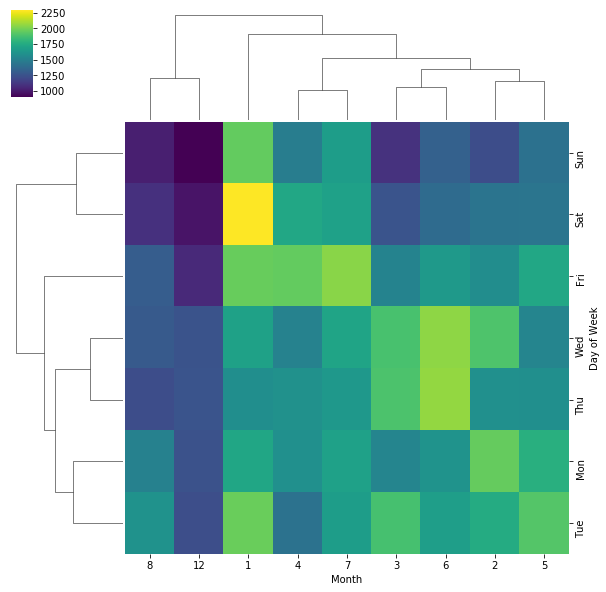

In [39]:
plt.figure(dpi=100)
sns.clustermap(dfMonth, cmap='viridis') #using clustermap to cluster similarities together